<a href="https://colab.research.google.com/github/HARDIK-IS-SHARMA/ML_Bike_Sharing_Demand_Prediction__Project_-Regression-/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - ***Bike Sharing Demand Prediction***



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Hardik Sharma

# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a **regression supervised machine learning model to predict the demand for bikes** in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After **preprocessing** and **cleaning the dat**a, I split it into **training and test** sets and used the training data to train our **machine learning model**. I experimented with several different **model architectures and hyperparameter**settings, ultimately selecting the model that **performed the best on the test data**.

To **evaluate the performance** of our model, I used a variety of metrics, including **mean absolute error, root mean squared error, and R-squared**. I found that our model was able to make highly accurate predictions, with an **R-squared value of 0.88** and a **mean absolute error of just 2.58**.

In addition to evaluating the performance of our model on the test data, I also conducted a series of **ablation studies** to understand the impact of individual features on the model's performance. I found that the **temperature, as well as the weather and seasonality feature**s, had the **greatest impact** on bike demand.

# **GitHub Link -**

link - https://github.com/HARDIK-IS-SHARMA/ML_Bike_Sharing_Demand_Prediction__Project_-Regression-/tree/main

# **Problem Statement**


### **Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.** ##

- My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import stat
import seaborn as sns
from scipy.stats import pearsonr
# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt

#Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

#For Warning ignorance
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load Dataset
bike_df = pd.read_csv('/content/SeoulBikeData.csv',  encoding='latin1')

### Dataset First View

In [3]:
# Dataset First Look
# using .sample to view the random sample from the dataset
bike_df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6051,10/08/2018,346,3,26.7,84,0.4,994,23.7,0.00,0.0,0.0,Summer,No Holiday,Yes
7659,16/10/2018,253,3,11.5,61,1.4,1399,4.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
6032,09/08/2018,1731,8,28.6,75,1.2,1588,23.7,0.56,0.0,0.0,Summer,No Holiday,Yes
4554,08/06/2018,3309,18,26.2,54,2.2,1183,16.1,0.88,0.0,0.0,Summer,No Holiday,Yes
5274,08/07/2018,2351,18,26.7,48,1.0,2000,14.7,0.53,0.0,0.0,Summer,No Holiday,Yes


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count\
bike_df.shape

(8760, 14)

- There are **8760 rows and 14 columns**

### Dataset Information

In [5]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

- info() Function give the Sum of all the **Null value** in each column and  what is there **Data type** of that perticular column

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
bike_df.duplicated().value_counts()

False    8760
Name: count, dtype: int64

- So giving total no. of False count justify that there is **0 duplicated values**

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

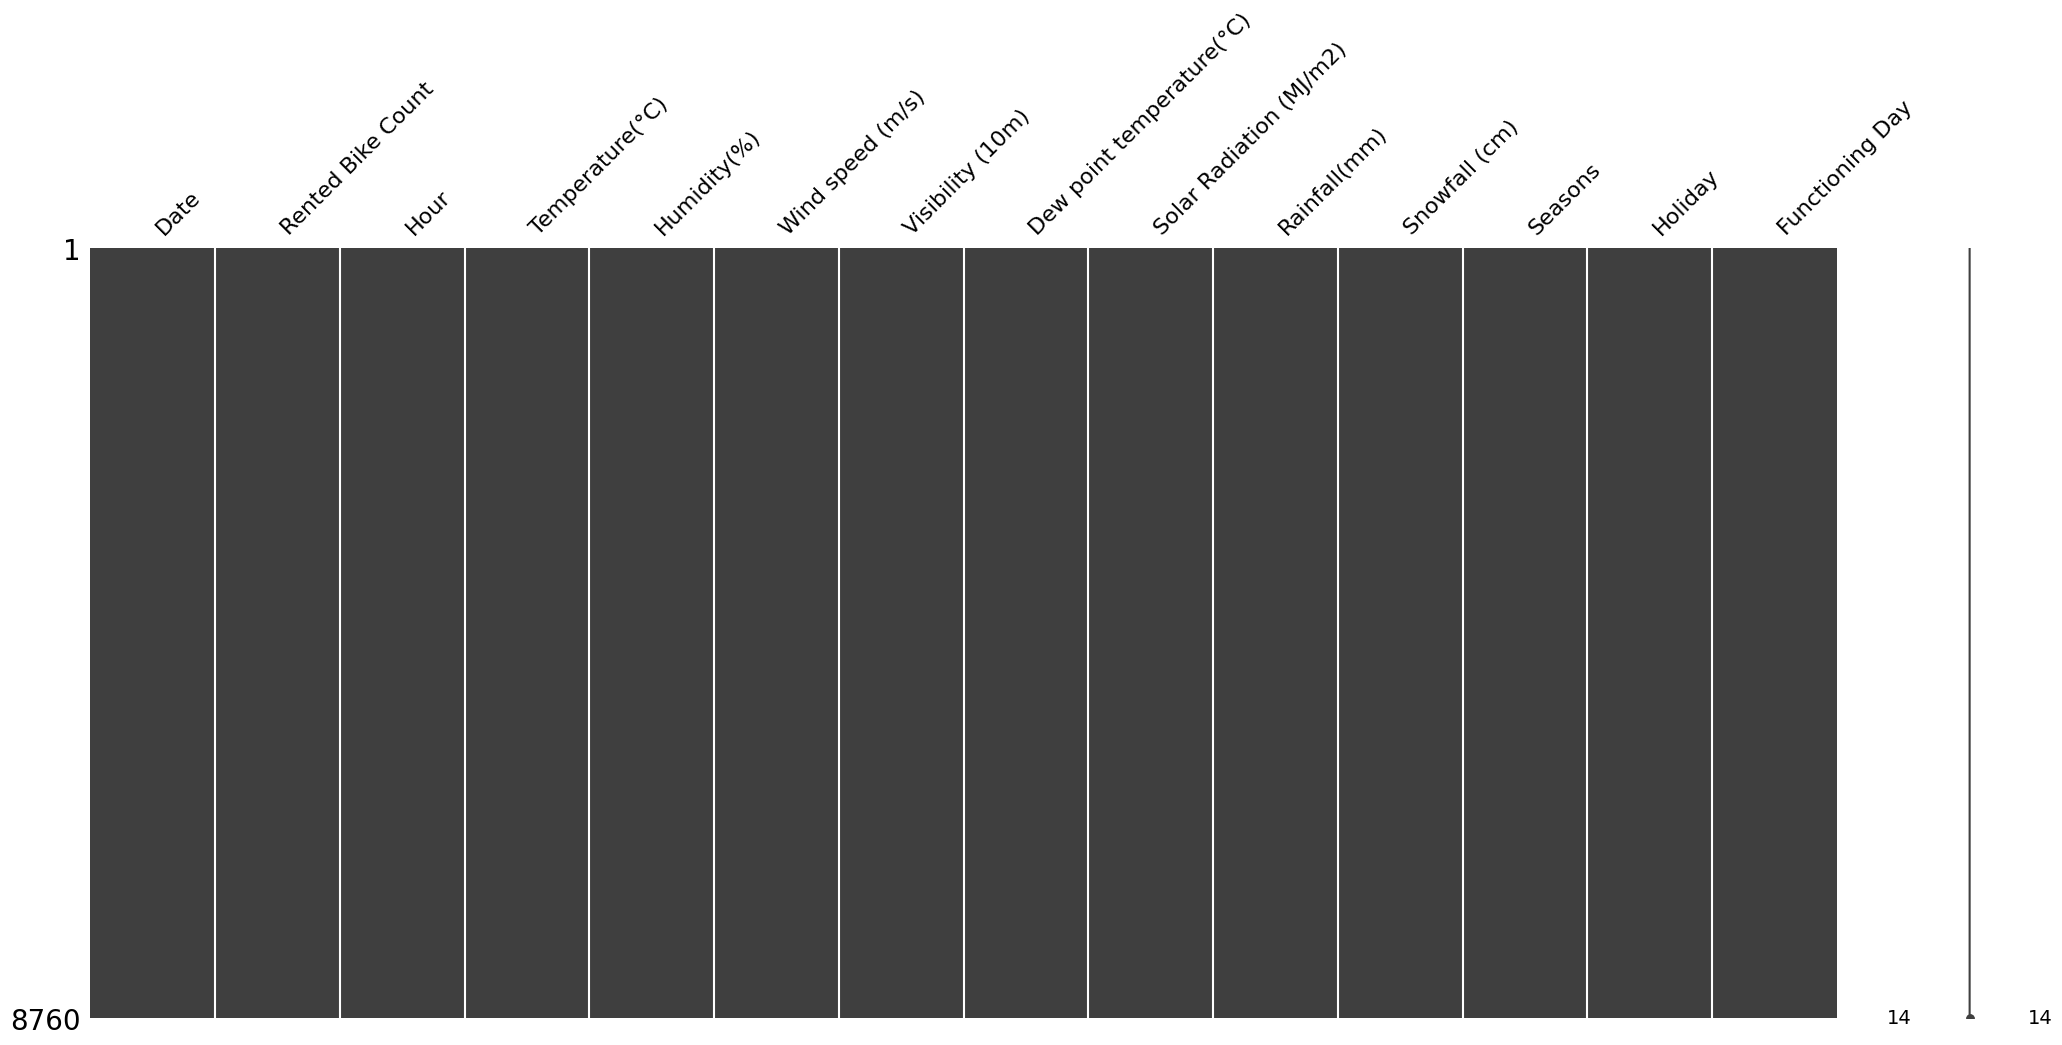

In [8]:
# Visualizing the missing values
import missingno as msno

# Visualize missing values as a matrix plot
msno.matrix(bike_df)
plt.show()

- As WE can see from the Matrix plot that There is **No Missing value** in the data set

### What did you know about your dataset?

- There are 8760 observation and 14 features.

- There are no null values.
- Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.

- Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


- Describe coloumn give the basics understanding of all the numerical column with respect to there mean , min value , mode , and there percentile distribution

### Variables Description

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count :** Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour:** The hour of the day, starting from 0-23 it's in a digital time
format, type : int, we need to convert it into category data type.

**Temperature(°C):** Temperature in Celsius, type : Float

**Humidity(%):** Humidity in the air in %, type : int

**Wind speed (m/s) :** Speed of the wind in m/s, type : Float

**Visibility (10m):** Visibility in m, type : int

**Dew point temperature(°C):** Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2):** Sun contribution, type : Float

**Rainfall(mm):** Amount of raining in mm, type : Float

**Snowfall (cm):** Amount of snowing in cm, type : Float

**Seasons:** *Season of the year, type : str, there are only 4 season's in data *.

**Holiday:** If the day is holiday period or not, type: str

**Functioning Day:** If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

- As From the Above Findings We see that there is **Zero null And duplicate Value** therfore we will not do any data preprocessing due to these outcome but we certainly do further processing like changing the Data types and converting them into there original field and also Some of the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results.

**Changing column name**

In [12]:
# Write your code to make your dataset analysis ready.

bike_df = bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

### **- The Date columns is very important for us to analyse the user behaviour but currently it is in Object(string form) so we need to convert it into the date and time format and after that we need to split it into 3 columns i.e. 'year', 'months' , 'day' as a category type** ##

## Breaking the Date Column

In [13]:
# changing the simple date column to "Year , Day , Month" column
bike_df['Date'] = bike_df['Date'].str.replace('-','/')
bike_df['Date'] = bike_df['Date'].apply(lambda x : dt.datetime.strptime(x , "%d/%m/%Y"))

In [14]:
# Now extracting the day , year , month from the date column

bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [15]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend'] = bike_df['day'].apply(lambda  x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

- **So we convert the "date" column into 3 different column i.e "year","month","day".**

- **The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.**

- **The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.**

In [16]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [17]:
bike_df['weekdays_weekend'].value_counts()

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

## Changing data type

- **As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data type. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.**

In [18]:
#changing those 3 column to ther esuitable datatype with the help of for loop
column = [ "Hour","month","weekdays_weekend"]
for i in column:
  bike_df[i] = bike_df[i].astype("category")


In [19]:
#cheking the data type of all
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [20]:
#Checking All Column name after changing it
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Exploratory Data Analysis Of The Data Set** ##


**Count of Rented bikes acording to Month**

Text(0.5, 1.0, 'Count of Rented bikes acording to Month')

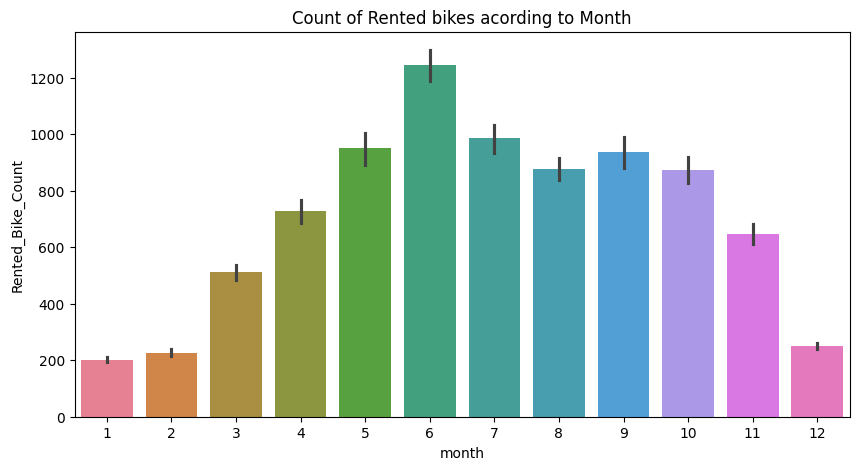

In [21]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count', hue = 'month', legend=False)
plt.title("Count of Rented bikes acording to Month")

- **From the above bar plot we can clearly say that, from the month 5 to 10 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.**

**Count of Rented bikes acording to weekdays_weekend differentitated by months**

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend')

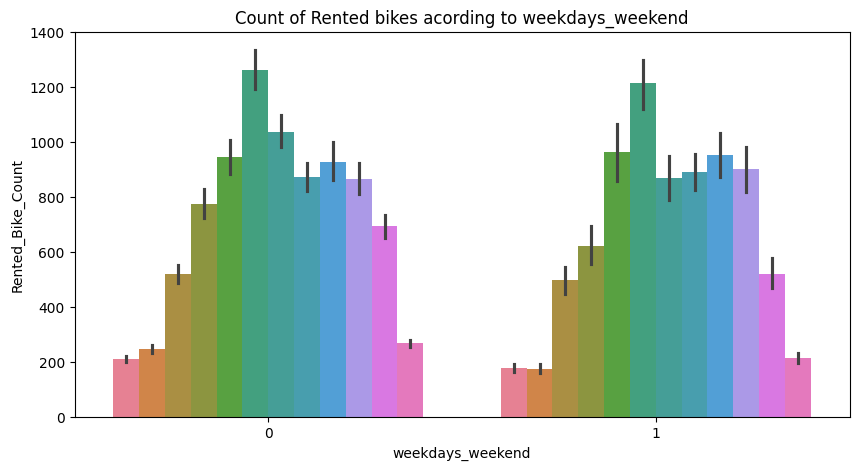

In [22]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count', hue = 'month', legend=False)
plt.title("Count of Rented bikes acording to weekdays_weekend")


[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

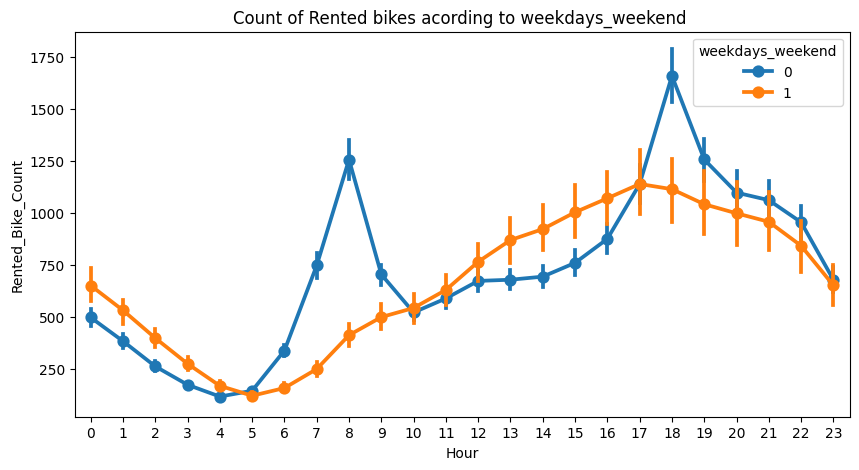

In [23]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

- **From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.**

**Count of Rented bikes acording to Hour**

Text(0.5, 1.0, 'Count of Rented bikes acording to Hours')

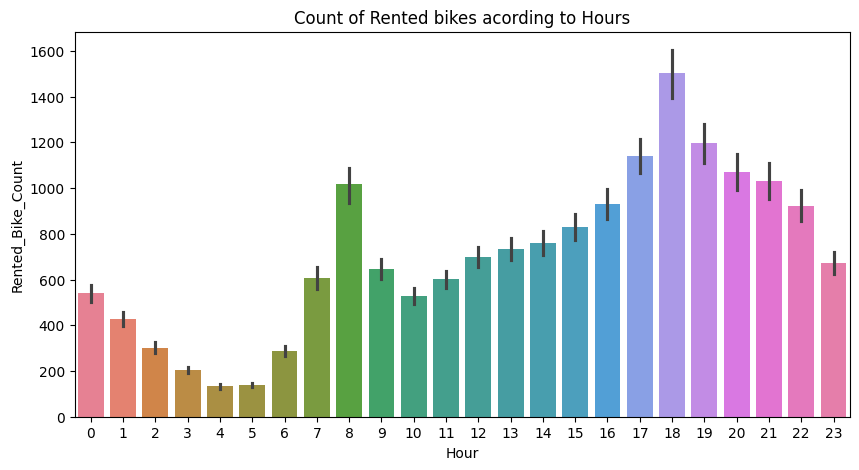

In [24]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count', hue = 'Hour', legend=False)
plt.title("Count of Rented bikes acording to Hours")


- **In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.**

- **Generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.**

**Count of Rented bikes acording to Functioning Day**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

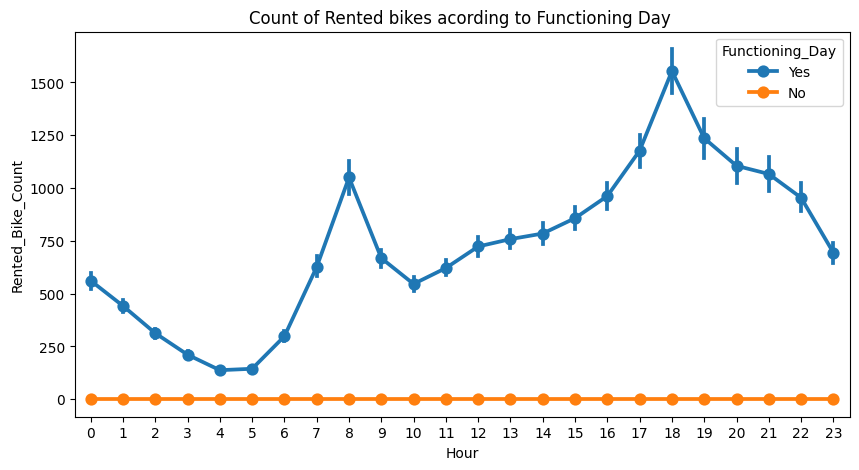

In [25]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(10,5))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

- **In the above point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that**,

- **Peoples don't use rented bikes in no functioning day.**

#### **Count of Rented bikes acording to Seasons**

Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons')

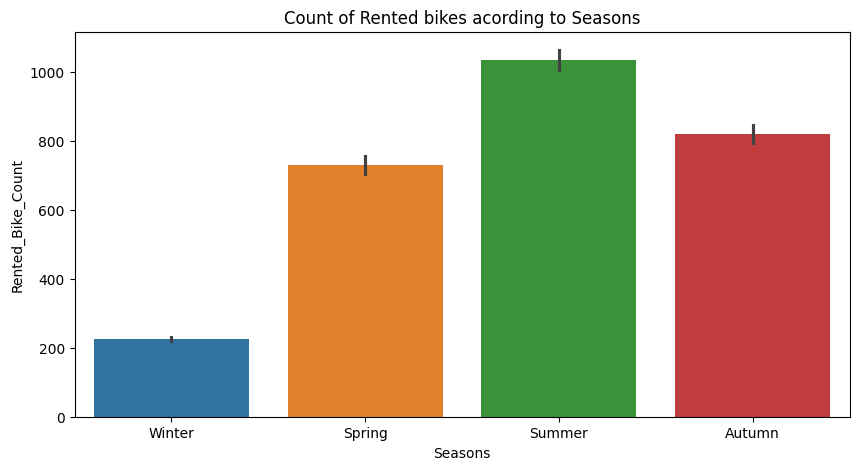

In [26]:
# Chart - 5 visualization code
plt.figure(figsize=(10,5))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count', hue = 'Seasons' , legend=False)
plt.title("Count of Rented bikes acording to Seasons")


[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

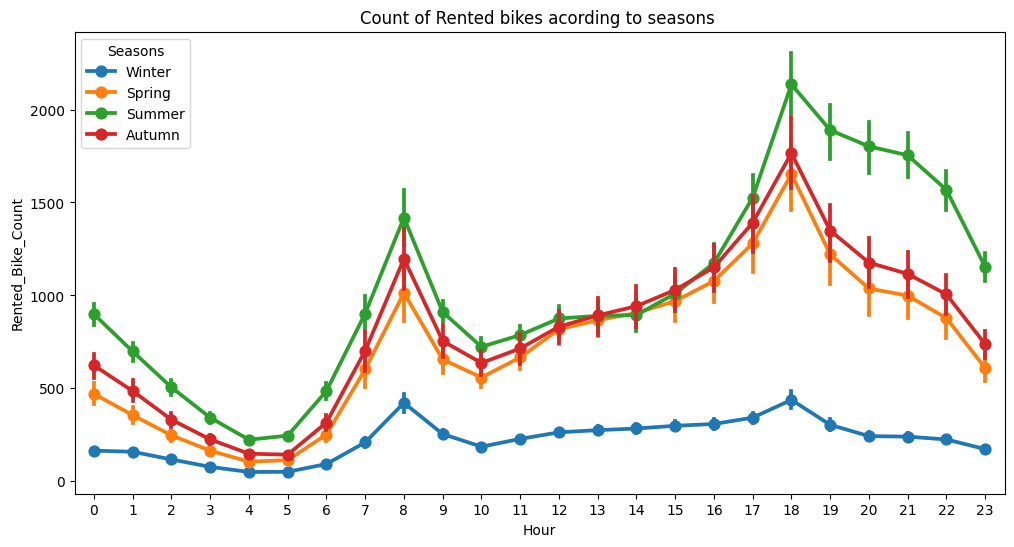

In [27]:
# Analysis by pointplot
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

- **In the above bar plot and point plot which shows, the use of rented bike in four different seasons, and it clearly shows that**

- **In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.**

- **In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.**

#### **Count of Rented bikes per hour acording to Holiday**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

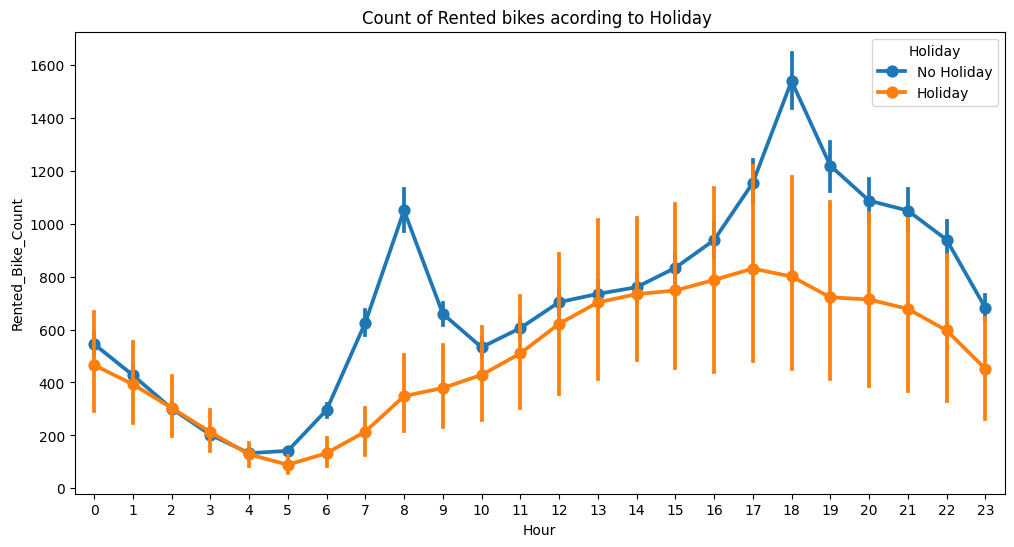

In [28]:
# Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')


- **In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,**
- **In holiday, people uses the rented bike from 2pm-8pm**

## **Analyze of Numerical variables** ##

**What is Numerical Data**

- **Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.**

## Lets Analyse the Skewness of the Dataset ##

In [29]:
#separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


**Analysing the distribution of all numerical features**

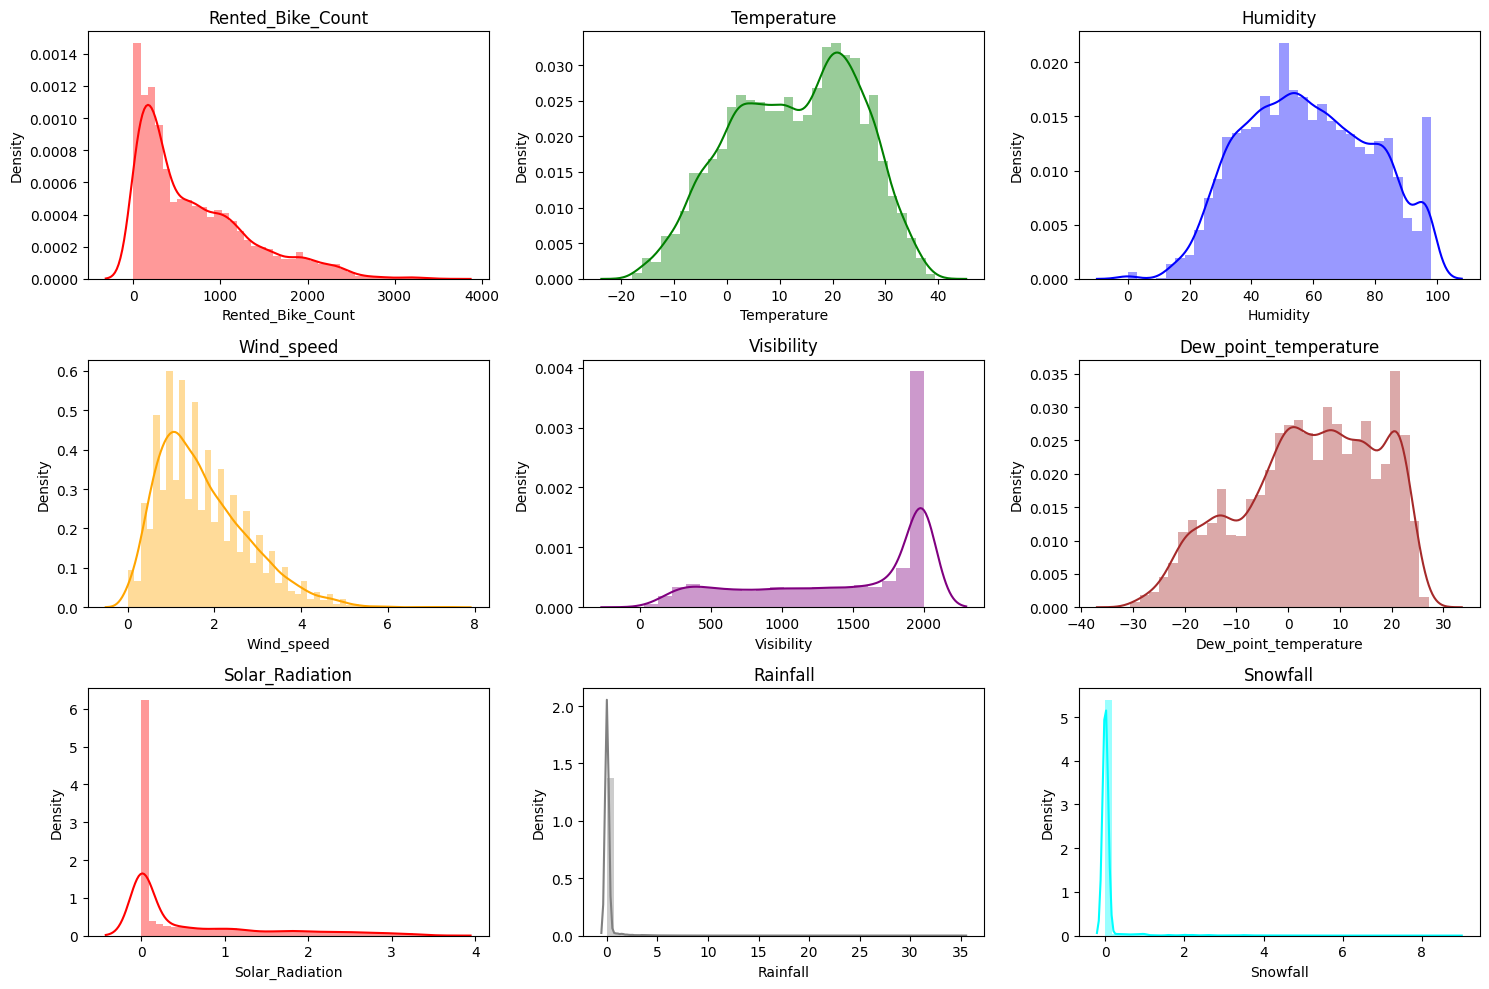

In [30]:
# Chart - 7 visualization code
# printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'red', 'gray', 'cyan']
for i , color in zip(numeric_features.columns, colors):
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i], color = color)
  plt.title(i)
  plt.tight_layout()



## Right skewed columns are :
- **Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar
 Radiation (MJ/m2), Rainfall(mm), Snowfall (cm)**

## Left skewed columns are :

- **Visibility (10m), Dew point temperature(°C)**

##  **Lets try to find how is the relation of numerical features with our dependent variable**


**Numerical VS Rented Bike Count**

#### Chart - 8

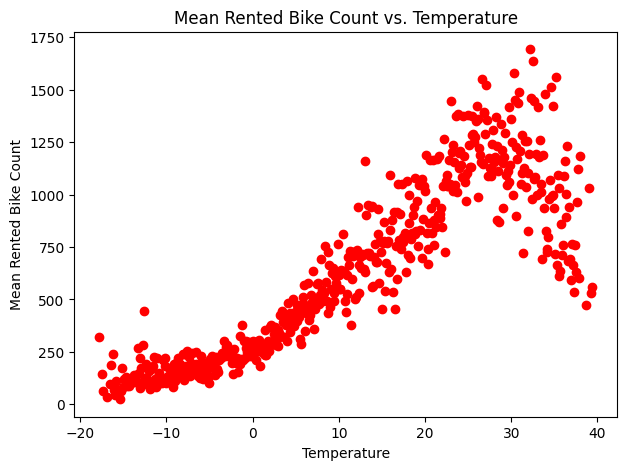

In [31]:
# Chart - 8 visualization code
# Group by 'Temperature' and calculate the mean of 'Rented_Bike_Count'

mean_rented_bike_count = bike_df.groupby('Temperature')['Rented_Bike_Count'].mean()

# Plot the scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(mean_rented_bike_count.index, mean_rented_bike_count.values, color='red')
plt.xlabel('Temperature')
plt.ylabel('Mean Rented Bike Count')
plt.title('Mean Rented Bike Count vs. Temperature')
plt.show()


- **From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C in average**

#### Chart - 9

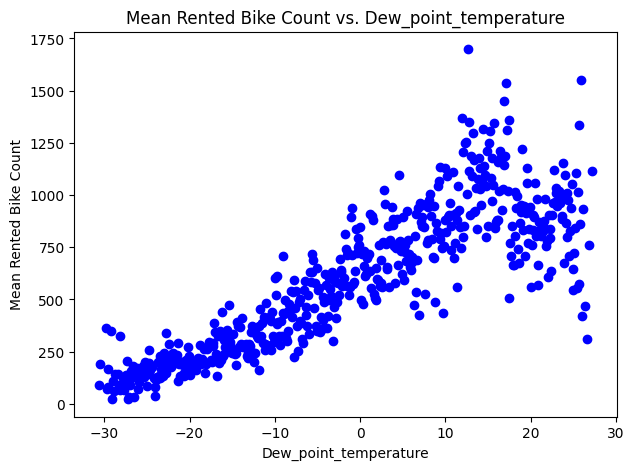

In [32]:
# Chart - 9 visualization code

mean_rented_bike_count = bike_df.groupby('Dew_point_temperature')['Rented_Bike_Count'].mean()

# Plot the scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(mean_rented_bike_count.index, mean_rented_bike_count.values, color='blue')
plt.xlabel('Dew_point_temperature')
plt.ylabel('Mean Rented Bike Count')
plt.title('Mean Rented Bike Count vs. Dew_point_temperature')
plt.show()

- **From the above plot of "Dew_point_temperature', is almost same as the 'temperature' there is some similarity present we can check it in our next step.**

#### Chart - 10

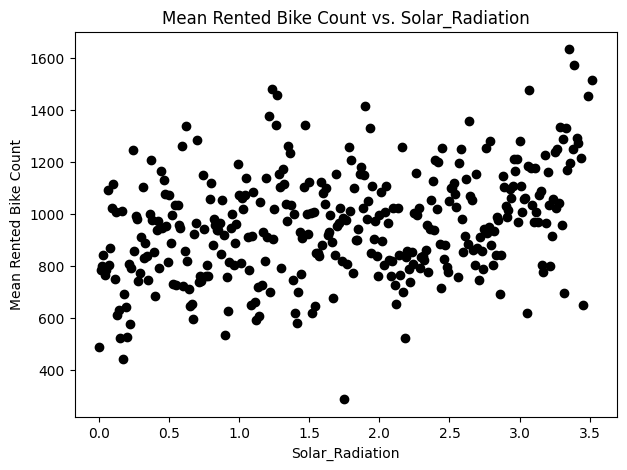

In [33]:
# Chart - 10 visualization code
mean_rented_bike_count = bike_df.groupby('Solar_Radiation')['Rented_Bike_Count'].mean()

# Plot the scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(mean_rented_bike_count.index, mean_rented_bike_count.values, color='black')
plt.xlabel('Solar_Radiation')
plt.ylabel('Mean Rented Bike Count')
plt.title('Mean Rented Bike Count vs. Solar_Radiation')
plt.show()

- **from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the count of rents is around 1000**

#### Chart - 11

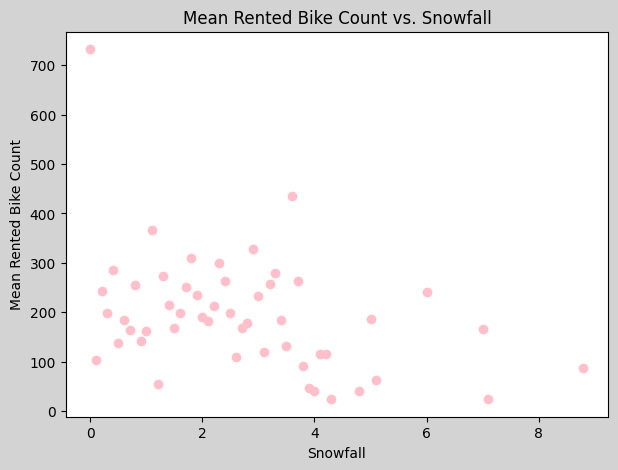

In [34]:
# Chart - 11 visualization code
mean_rented_bike_count = bike_df.groupby('Snowfall')['Rented_Bike_Count'].mean()

# Plot the scatter plot
plt.figure(figsize=(7, 5),  facecolor='lightgray')
plt.scatter(mean_rented_bike_count.index, mean_rented_bike_count.values, color='pink')
plt.xlabel('Snowfall')
plt.ylabel('Mean Rented Bike Count')
plt.title('Mean Rented Bike Count vs. Snowfall')
plt.show()


- **We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower**

#### **Rented Bikes by day Vs weekend**

Text(0, 0.5, 'Rented Bikes')

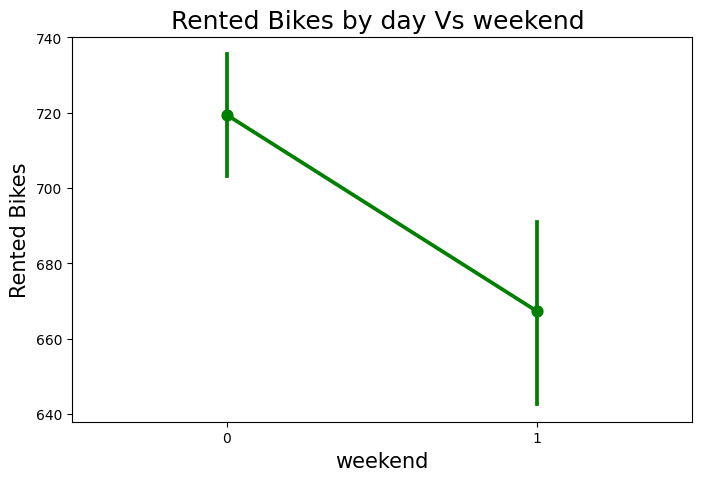

In [35]:
fig,ax=plt.subplots(figsize=(8,5))
sns.pointplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',  color ='green')
ax.set_title('Rented Bikes by day Vs weekend ', fontsize=18)
ax.set_xlabel('weekend',fontsize=15)
ax.set_ylabel('Rented Bikes',fontsize=15)

Text(0.5, 1.0, 'Rented Bikes by day Vs weekend ')

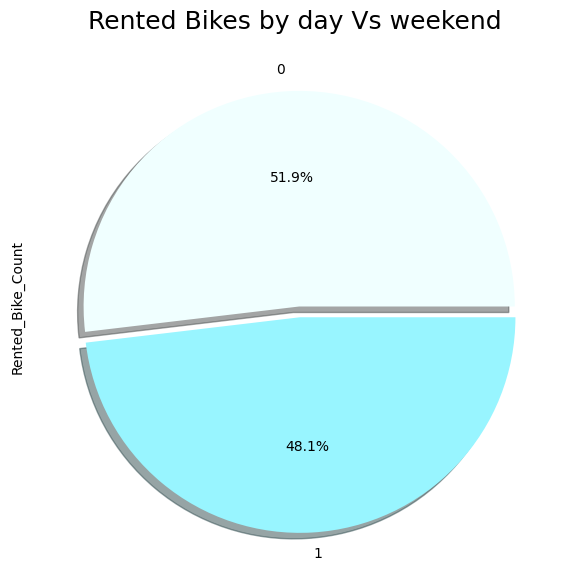

In [36]:
# Chart - 12 visualization code
bike_df.groupby('weekdays_weekend')['Rented_Bike_Count'].mean().sort_values(ascending=False).plot(kind='pie',shadow=True,autopct='%1.1f%%',colors = ('#F0FFFF','#98F5FF'),figsize=(15,7),explode=[0,0.05])
plt.title('Rented Bikes by day Vs weekend ', fontsize=18)


- **Bikes rented on saturday was more it was around 719 while it was low on sundays around 667**

- **We can say people rented bikes more on saturday while less on sundays so the availabiality of the bikes should be more on saturday.**

#### Chart - 13

<Axes: xlabel='Wind_speed'>

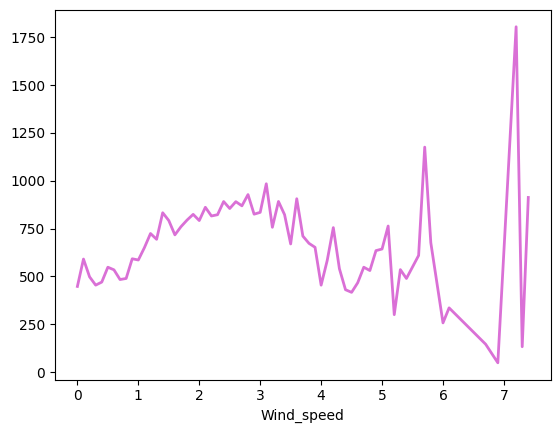

In [37]:
# Chart - 13 visualization code

#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed')['Rented_Bike_Count'].mean().plot(color = 'orchid', linewidth = 2)


#### Chart - 14 - Correlation Heatmap

<Axes: >

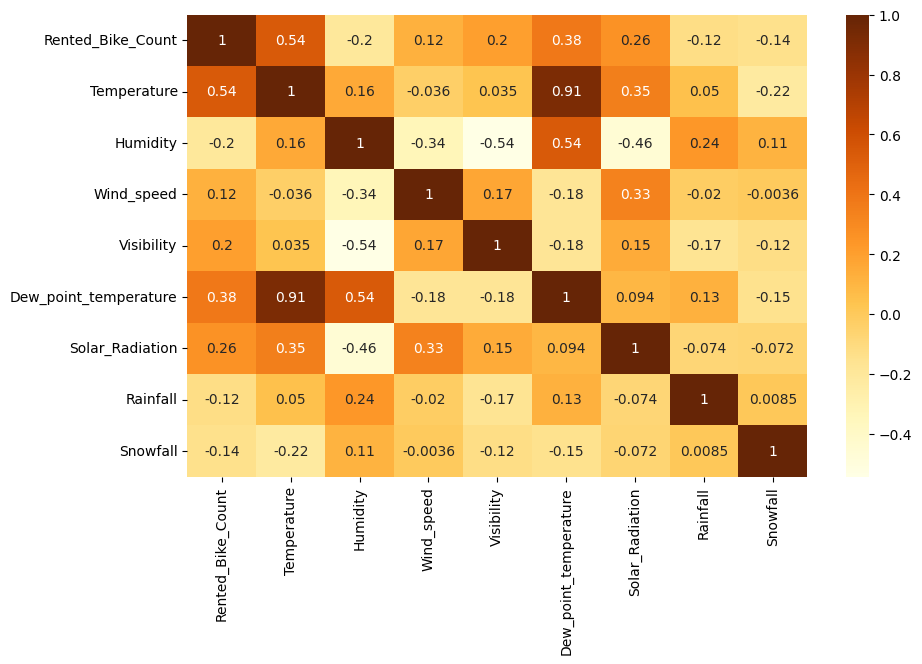

In [38]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
numeric_df = bike_df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), cmap="YlOrBr", annot = True)

- ## **We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are:** ##

- **the temperature**
- **the dew point temperature**
- **the solar radiation**

- ## **And most negatively correlated variables are:** ##

- **humidity**
- **rainfall**

#### Chart - 15 - Pair Plot

In [39]:
# Pair Plot visualization code
sns.pairplot(bike_df , hue = 'Rented_Bike_Count')

- **Rented Bike Count is more affected by heavy rainfall and snowfall. There is low count on weekends too.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. - **Is there any relation between Visibility and Rented Bike Count?**

2. - **Is there any relation between Rainfall and Rented Bike count?**



### Hypothetical Statement - 1

**Is there any relation between Visibility and Rented Bike Count?**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0:There is no relationship betwen Rented BIke Count and Visibility

H1:There is relationship betwen Rented BIke Count and Visibility

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Create two arrays of data
x = bike_df['Rented_Bike_Count']
y = bike_df['Visibility']

# Calculate the Pearson correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(x, y)

# Print the results
print('Pearson correlation coefficient:', corr_coef)
print('P-value:', p_value)

Pearson correlation coefficient: 0.19928029673135897
P-value: 3.672703665912844e-79


- **Our p value is belows 0.05 so we accept the alternate hypothesis**

##### Which statistical test have you done to obtain P-Value?

- **Pearson correlation test is used by me**

##### Why did you choose the specific statistical test?

- **The significance of PCC is basically to show you how strongly correlated the two variables/lists are**

### Hypothetical Statement - 2

**Is there any relation between Rainfall and Rented Bike count?**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H0:There is relationship between Rented bike count and the rainfall**

**H1:There is no relationship between Rented bike count and the rainfall**

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Create a contingency table
cont_table = pd.crosstab(bike_df['Rented_Bike_Count'], bike_df['Rainfall'])

# Conduct chi-square test
chi2_stat, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 67628.30610774716
p-value: 1.0


- we accept our null hypothesis

##### Which statistical test have you done to obtain P-Value?

-
I have used chi-square test here

##### Why did you choose the specific statistical test?

- chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
bike_df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
weekdays_weekend         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

- **As there is Zero null Value so we are not doing any implementation**

### 2. Handling Outliers

[]

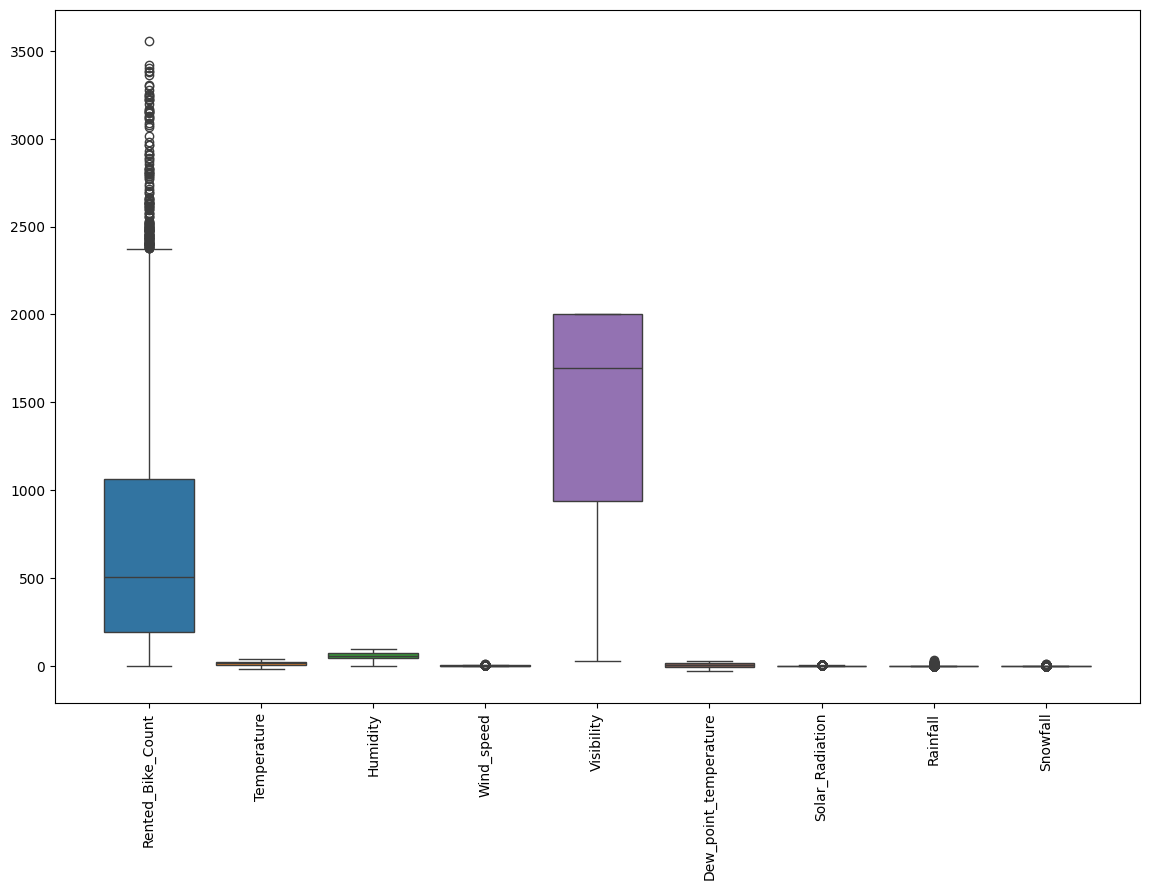

In [43]:
# Handling Outliers & Outlier treatments

plt.figure(figsize=(14,9))
sns.boxplot(data = bike_df)
plt.xticks(rotation = 90)
plt.plot()

<Axes: ylabel='Rented_Bike_Count'>

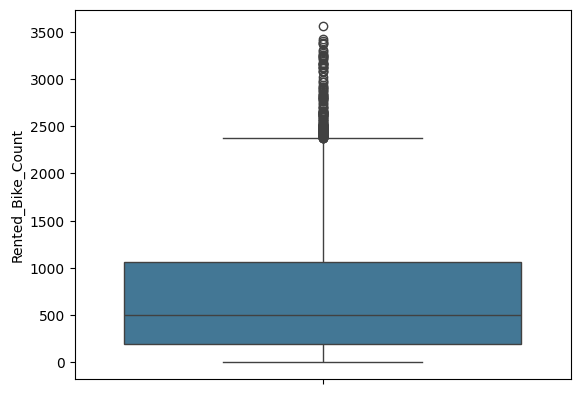

In [44]:
#taking care of outlier for column = Rented_bike_count
sns.boxplot(bike_df['Rented_Bike_Count'],palette="mako")

In [45]:
percentile25 = bike_df['Rented_Bike_Count'].quantile(0.25)
percentile75 = bike_df['Rented_Bike_Count'].quantile(0.75)

In [46]:
iqr = percentile75 - percentile25

In [47]:
upperlimit = percentile75 + 1.5*iqr
lowerlimit = percentile25 + 1.5*iqr

In [48]:
new_df = bike_df[bike_df['Rented_Bike_Count']< upperlimit]
new_df.shape

(8602, 15)

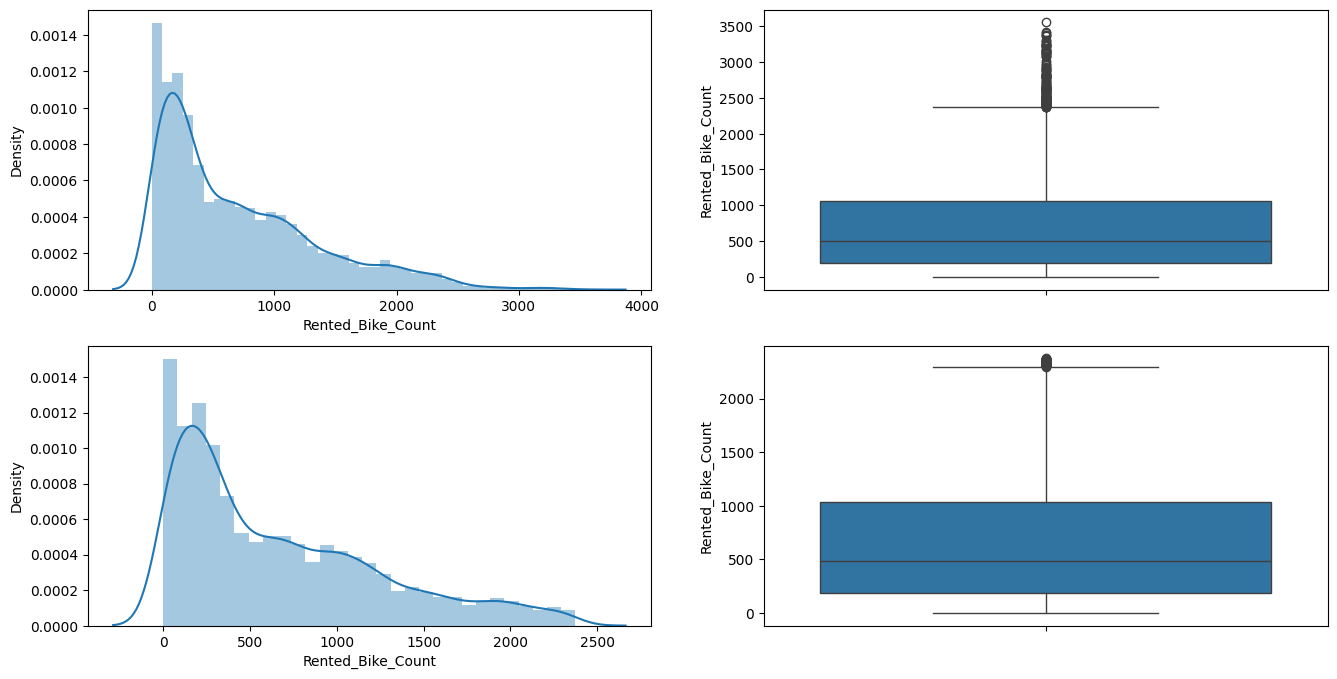

In [49]:
# Comparing the plots after trimming

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(bike_df['Rented_Bike_Count'])
plt.subplot(2,2,2)
sns.boxplot(bike_df['Rented_Bike_Count'])
plt.subplot(2,2,3)
sns.distplot(new_df['Rented_Bike_Count'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Rented_Bike_Count'])
plt.show()

<Axes: ylabel='Wind_speed'>

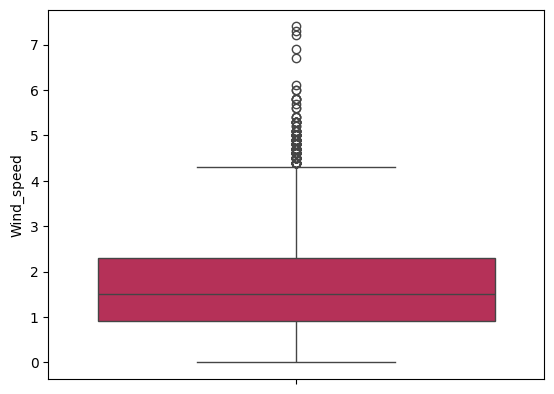

In [50]:
# Treating the outlier for wind_speed column
sns.boxplot(bike_df['Wind_speed'],palette='rocket')

In [51]:
iqr1 = bike_df['Wind_speed'].quantile(0.75) - bike_df['Wind_speed'].quantile(0.25)
upper_limit = bike_df['Wind_speed'].quantile(0.75) + 1.5*iqr1
bike_df['Wind_speed'] = bike_df['Wind_speed'].apply(lambda x: bike_df['Wind_speed'].mean()  if x > upper_limit else x)

<Axes: ylabel='Wind_speed'>

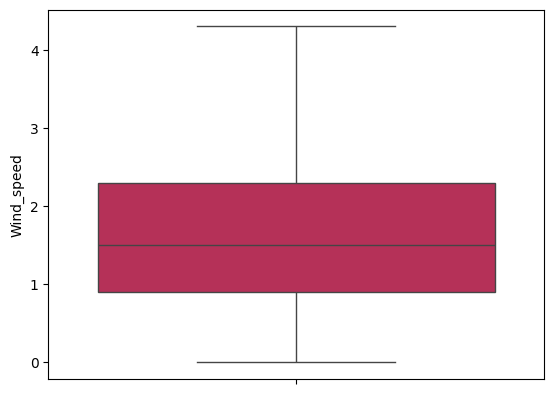

In [52]:
#After outliear Treatment
sns.boxplot(bike_df['Wind_speed'],palette='rocket')

<Axes: ylabel='Solar_Radiation'>

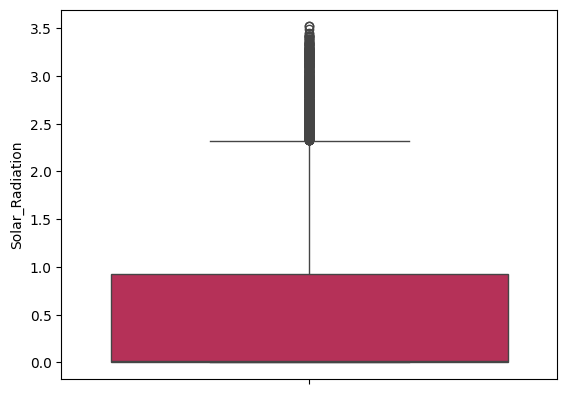

In [53]:
# Treating the outlier for Solar_Radiation column
sns.boxplot(bike_df['Solar_Radiation'],palette='rocket')

In [54]:
iqr2 = bike_df['Solar_Radiation'].quantile(0.75) - bike_df['Solar_Radiation'].quantile(0.25)
upper_limit = bike_df['Solar_Radiation'].quantile(0.75) + 1.5*iqr1
bike_df['Solar_Radiation'] = bike_df['Solar_Radiation'].apply(lambda x: bike_df['Solar_Radiation'].mean() if x > upper_limit else x)

<Axes: ylabel='Solar_Radiation'>

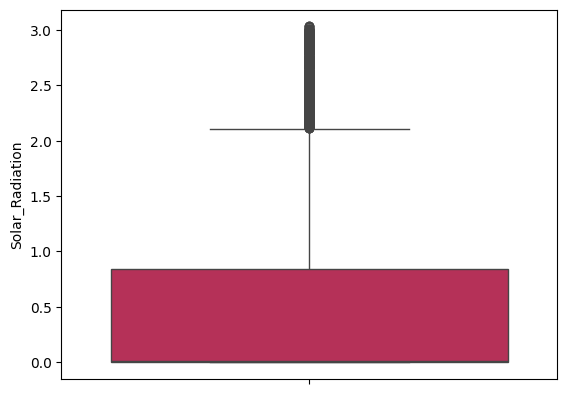

In [55]:
#After removal of outliear
sns.boxplot(bike_df['Solar_Radiation'],palette='rocket')

##### What all outlier treatment techniques have you used and why did you use those techniques?

- We have used the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers. To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. This gives us the minimum and maximum fence posts that we compare each observation to. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers. and after our rented bike count columns we just inputed the outliers with mean.

### 3. Categorical Encoding

- **One Hot Encoding**

In [56]:
bike_df.shape

(8760, 15)

In [57]:
# Encode your categorical columns
#Assign all categorical features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [58]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    dummies = pd.get_dummies(data[column], prefix=column, drop_first=True)
    # Ensure the dummies are integers
    dummies = dummies.astype(int)
    data = pd.concat([data,dummies], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

<Figure size 1000x600 with 0 Axes>

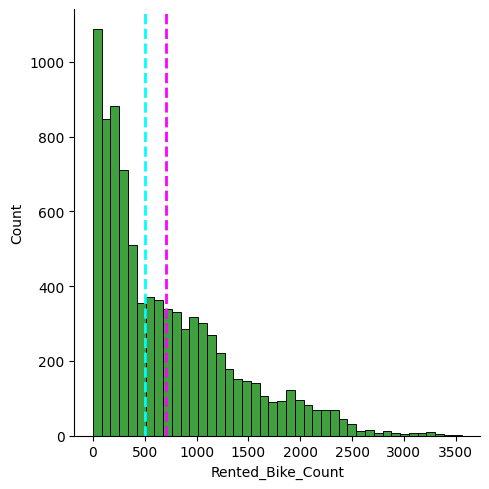

<Figure size 1000x600 with 0 Axes>

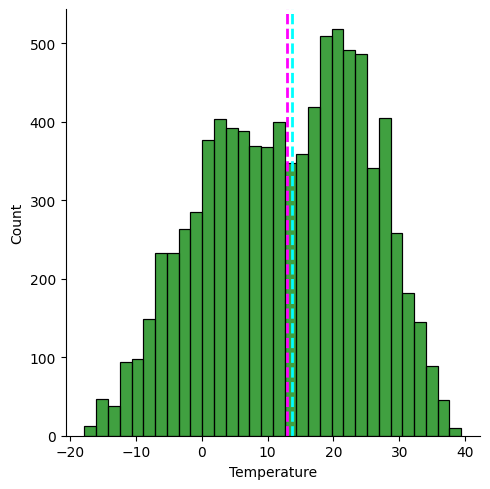

<Figure size 1000x600 with 0 Axes>

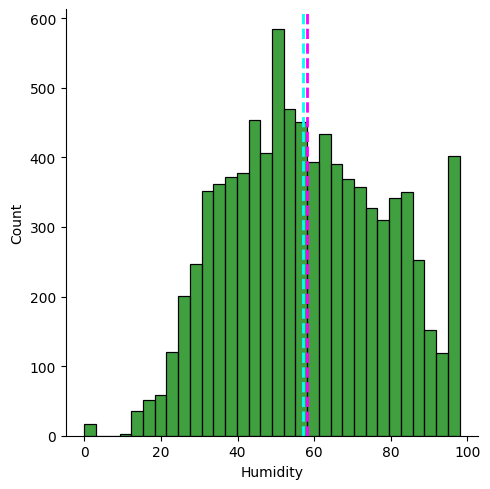

<Figure size 1000x600 with 0 Axes>

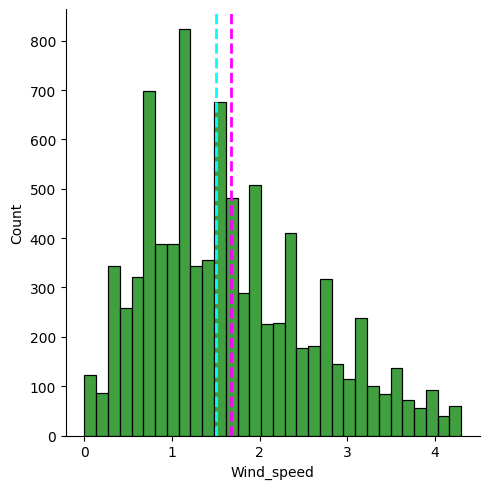

<Figure size 1000x600 with 0 Axes>

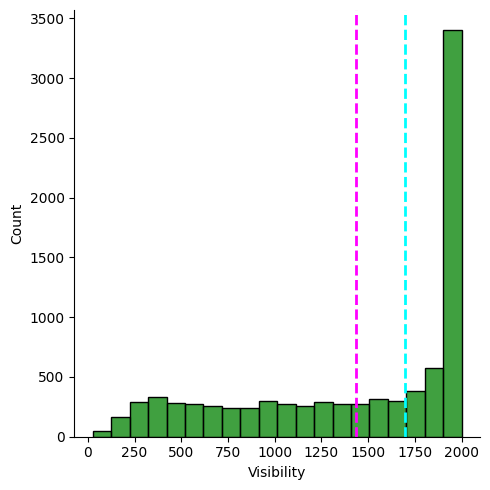

<Figure size 1000x600 with 0 Axes>

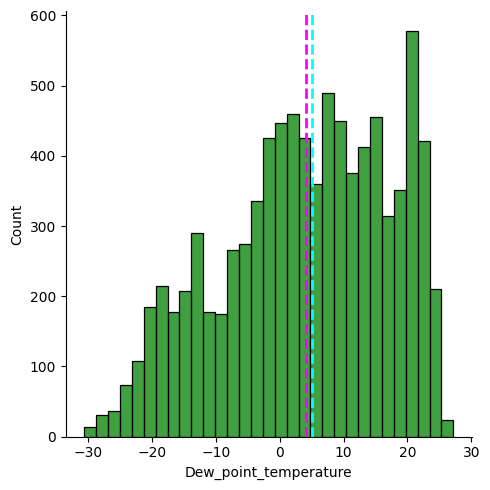

<Figure size 1000x600 with 0 Axes>

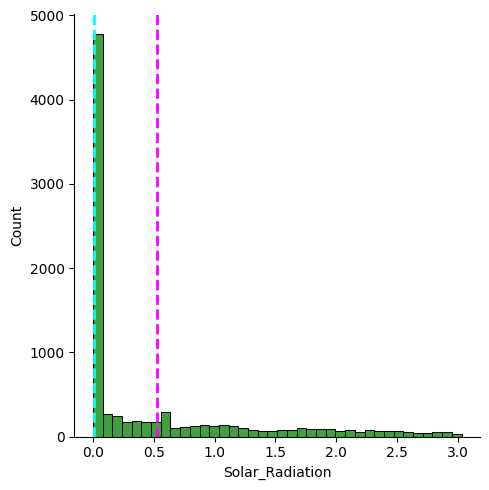

<Figure size 1000x600 with 0 Axes>

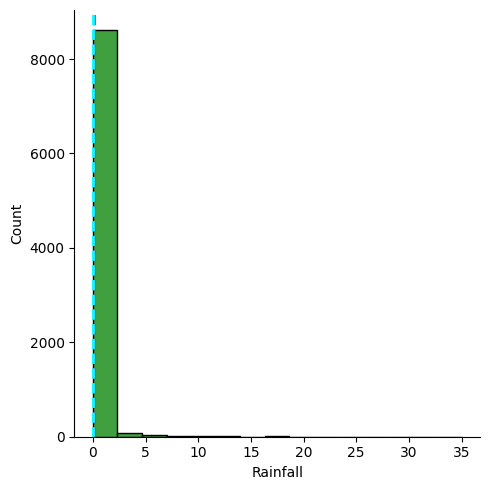

<Figure size 1000x600 with 0 Axes>

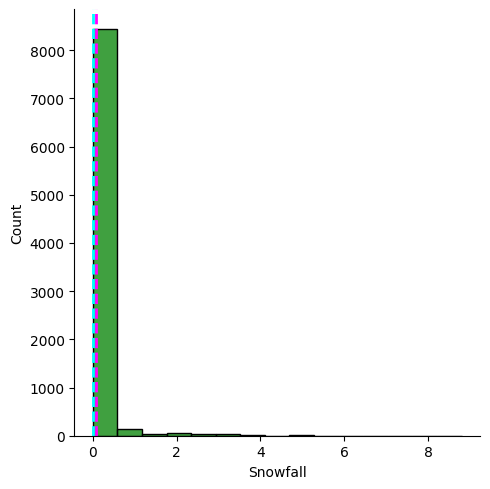

In [61]:
# Transform Your data

for col in bike_df.select_dtypes(include=['int', 'float']).columns:
  plt.figure(figsize=(10,6))
  sns.displot(x=bike_df[col] , color ='green')
  plt.xlabel(col)
  plt.axvline(bike_df[col].mean(),color='magenta', linestyle='dashed',linewidth=2)
  plt.axvline(bike_df[col].median(),color='cyan', linestyle='dashed',linewidth=2)
  plt.show()
plt.show()

### 6. Data Scaling

In [62]:
# Scaling your data
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(bike_df_copy)
print(scaled)

[[0.07142857 0.22027972 0.37755102 ... 0.         1.         0.        ]
 [0.05736783 0.21503497 0.3877551  ... 0.         1.         0.        ]
 [0.04865017 0.20629371 0.39795918 ... 0.         1.         0.        ]
 ...
 [0.1951631  0.35664336 0.39795918 ... 1.         0.         0.        ]
 [0.20022497 0.3479021  0.41836735 ... 1.         0.         0.        ]
 [0.16422947 0.34440559 0.43877551 ... 1.         0.         0.        ]]


##### Which method have you used to scale you data and why?

- I have used Min Max scaler scaling technique in this MInMaxScaler() scale the features of your data to a specified range, usually [0, 1]

## 7. Dimesionality Reduction

No Need OF Dimensionality Reduction

### 8. Data Splitting

## Train Test split for regression

In [63]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [64]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [66]:

#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
print(X_train.shape)
print(X_test.shape)

(7008, 48)
(1752, 48)


##### What data splitting ratio have you used and why?

- I Have used splitting ratio of 80:20 as it is consider to be the best ratio for model training i.e 80% for trainig and 20% for testing.

### 9. Handling Imbalanced Dataset

In [67]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Temperature            8760 non-null   float64
 2   Humidity               8760 non-null   int64  
 3   Wind_speed             8760 non-null   float64
 4   Visibility             8760 non-null   int64  
 5   Dew_point_temperature  8760 non-null   float64
 6   Solar_Radiation        8760 non-null   float64
 7   Rainfall               8760 non-null   float64
 8   Snowfall               8760 non-null   float64
 9   Hour_1                 8760 non-null   int64  
 10  Hour_2                 8760 non-null   int64  
 11  Hour_3                 8760 non-null   int64  
 12  Hour_4                 8760 non-null   int64  
 13  Hour_5                 8760 non-null   int64  
 14  Hour_6                 8760 non-null   int64  
 15  Hour

##### Do you think the dataset is imbalanced? Explain Why.

The Data is not Imbalanced , so we are not doing anything with that


In [68]:

bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning_Day_Yes', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekdays_weekend_1'],
      dtype='object')


- The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

- MSE formula = (1/n) * Σ(actual – forecast)2 Where:

- n = number of items,

- Σ = summation notation,

- Actual = original or observed y-value,

- Forecast = y-value from regression.

- Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

- Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

- R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

- R 2 =1− Total Variation Unexplained Variation​

- Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.​


## ***7. ML Model Implementation***

## LINEAR REGRESSION

- Linear regression is a statistical method for modeling the relationship between a dependent variable
𝑦
and one or more independent variables
𝑥
. It aims to predict
y based on
𝑥
by fitting a linear equation to observed data.


In [69]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)


In [70]:
#check the score
reg.score(X_train, y_train)

0.776818707957689

In [71]:
#check the coefficeint
reg.coef_

array([ 1.20332401e-01, -2.30576646e-01,  8.87280488e-02,  1.10417535e-03,
        4.36411605e-01,  1.19893198e+00, -1.47726239e+00,  2.85008400e-02,
       -1.91152320e+00, -4.82222071e+00, -7.18367275e+00, -9.38775248e+00,
       -9.04176371e+00, -3.95213532e+00,  2.23355798e+00,  7.49199058e+00,
        1.09491623e+00, -3.50650626e+00, -3.76335135e+00, -2.74508512e+00,
       -2.67110527e+00, -2.83835508e+00, -1.92577681e+00,  3.00613007e-02,
        3.76920964e+00,  1.03232919e+01,  6.75986063e+00,  5.95551846e+00,
        6.27681719e+00,  5.06793442e+00,  1.54275301e+00, -4.01515981e-01,
       -1.47822470e+00, -4.56407618e+00,  3.47191888e+00,  2.84023532e+01,
       -7.69629139e-01, -1.51519220e+00, -4.42184442e-01,  1.55586066e+00,
        4.49727235e+00, -1.86571320e+00, -4.10978385e+00,  2.40825717e-01,
        3.32385518e+00,  2.87913596e+00,  2.12826528e+00, -1.34612925e+00])

In [72]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [73]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



MSE : 34.444265718780024
RMSE : 5.868923727463156
MAE : 4.42690147716074
R2 : 0.776818707957689
Adjusted R2 : 0.770528219397483


- **Looks like our train set's r2 score value is 0.77 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [75]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 33.797790002325264
RMSE : 5.813586672814405
MAE : 4.420016102831562
R2 : 0.7853921313004093
Adjusted R2 : 0.7793432894345371


- **The test set's r2_score is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

**Heteroscedasticity**

- Heteroscedasticity refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model.This violates one of the assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s). If the plot shows a funnel shape, with the spread of residuals increasing or decreasing as the predicted values increase, this is an indication of heteroscedasticity.

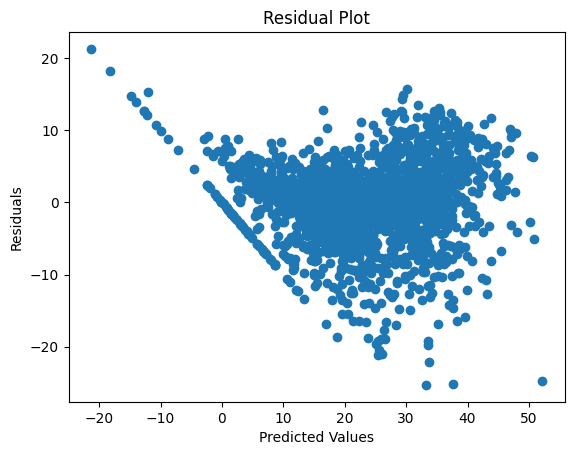

In [77]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

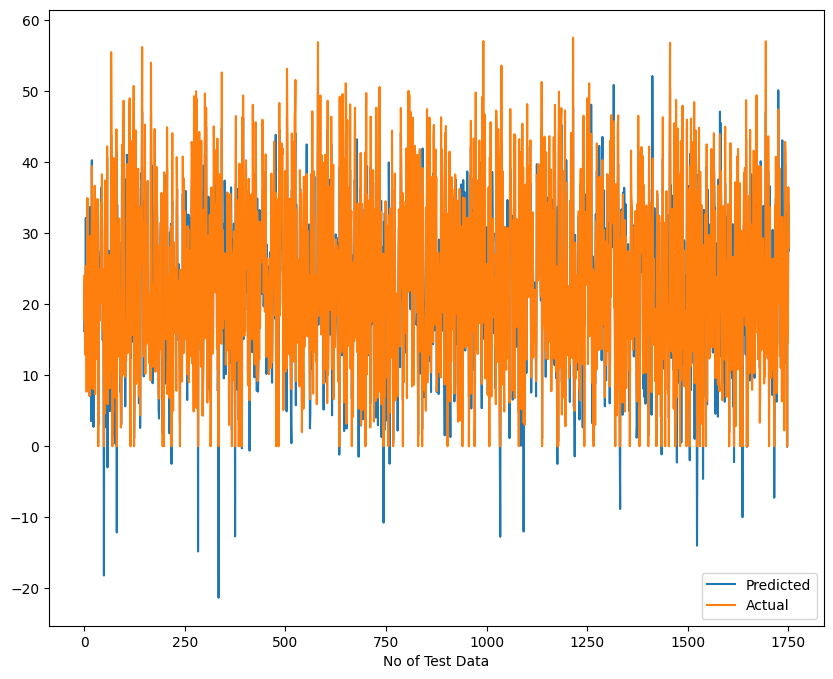

In [78]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##**Ridge and Lasso Regression**

- Ridge and Lasso Regression are types of Regularization techniques

- Regularization techniques are used to deal with overfitting and when the dataset is large

- Ridge and Lasso Regression involve adding penalties to the regression function

## **Lasso Regression**

- Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [79]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [80]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.38354931956674243 0.4059516284119845


In [81]:

#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 91.68134019453143
RMSE : 9.575037346900086
MAE : 7.25236195572733
R2 : 0.4059516284119845
Adjusted R2 : 0.38920804541948606


- **Looks like train set's r2 score value is 0.40 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [84]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



MSE : 97.08251039591772
RMSE : 9.853045742100141
MAE : 7.442888428031137
R2 : 0.38354931956674243
Adjusted R2 : 0.36617431506833


- **The test set's r2_score is 0.38. This means our linear model is not performing well on the data.**

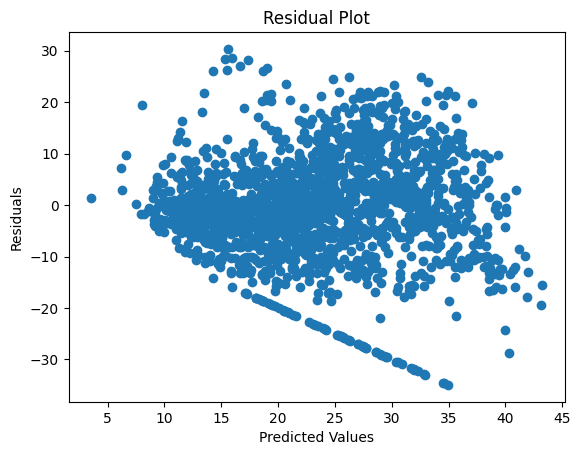

In [86]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

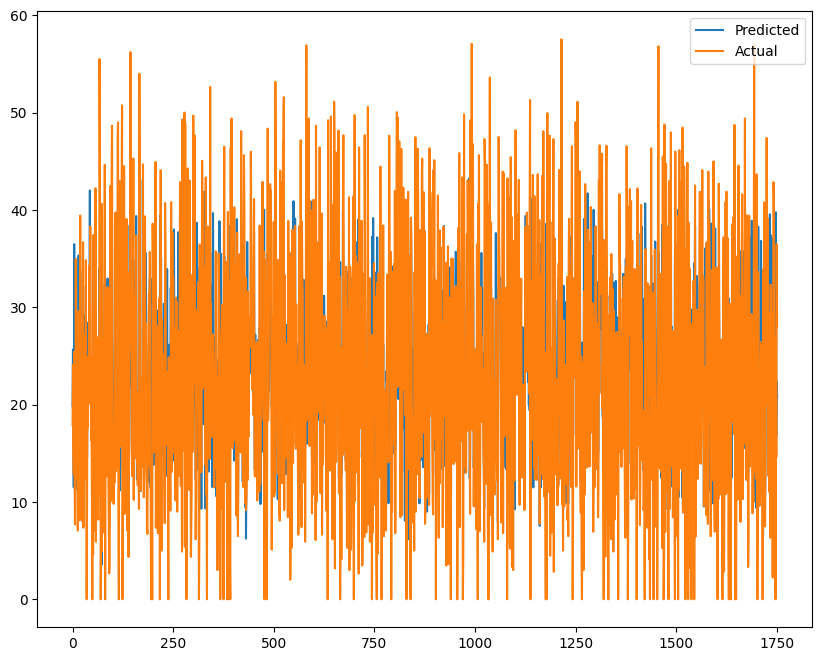

In [87]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **RIDGE REGRESSION**

- Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [90]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [91]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [92]:
#check the score
ridge.score(X_train, y_train)

0.7768186435631648

In [93]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [94]:
y_pred_train_ridge

array([16.03622535, 40.92643334, 27.46747988, ..., 35.30322466,
       23.35251878, 21.04479476])

In [95]:
y_pred_test_ridge

array([16.2239436 , 22.87684251, 20.22958131, ..., 20.30057169,
       33.97118699, 27.57310436])

In [96]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34.44427565698804
RMSE : 5.86892457414372
MAE : 4.4269745579344315
R2 : 0.7768186435631648
Adjusted R2 : 0.7705281531879633


- **Looks like our train set's r2 score value is 0.77 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [99]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



MSE : 33.79922362844414
RMSE : 5.813709971132387
MAE : 4.420192378596455
R2 : 0.7853830281180456
Adjusted R2 : 0.7793339296739271


- **The r2_score for the test set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)**.

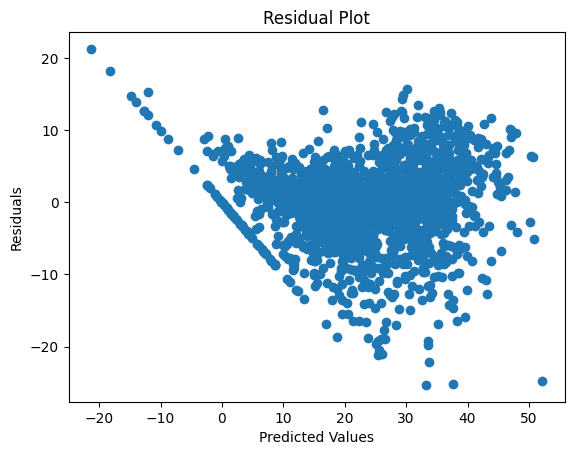

In [101]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

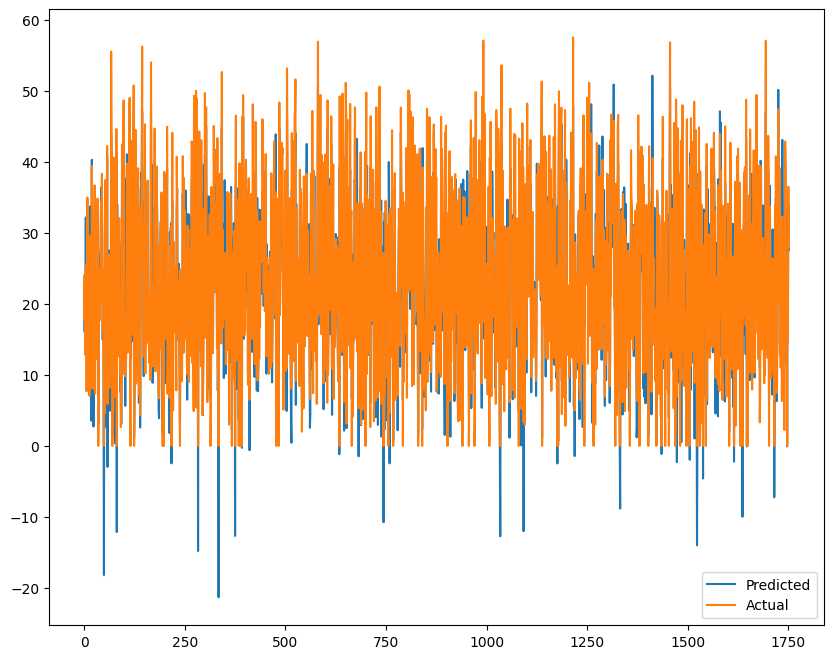

In [102]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## DECISION TREE

- A decision tree is a type of supervised machine learning algorithm that is commonly used for classification and regression tasks. It works by recursively splitting the data into subsets based on the values of certain attributes, ultimately arriving at a set of decision rules that can be used to classify or predict outcomes for new data.

In [103]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [104]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [105]:
print(y_pred_train_d)
print(y_pred_test_d)


[18.67759288 50.73693237 31.59199712 ... 36.21715229 27.49242209
 18.64946143]
[21.95598517 31.51100292 16.98638485 ... 15.21137952 21.95598517
 21.95598517]


In [106]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.6866418271780591
MSE : 48.361545320671866
RMSE : 6.954246567434309
MAE : 5.156768540019073
R2 : 0.6866418271780591
Adjusted R2 : 0.6778096531936473


- **Looks like our train set's r2 score value is 0.68, that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [108]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 61.13803607430053
RMSE : 7.819081536491388
MAE : 5.573833565377496
R2 : 0.6117881193568683
Adjusted R2 : 0.6008461520809608


- **The r2_score for the test set is 0.61. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

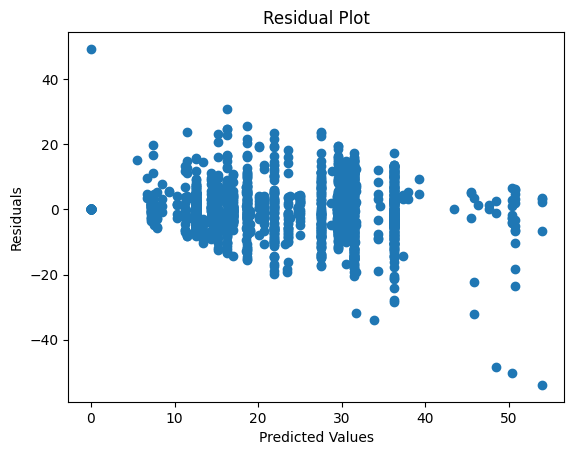

In [110]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

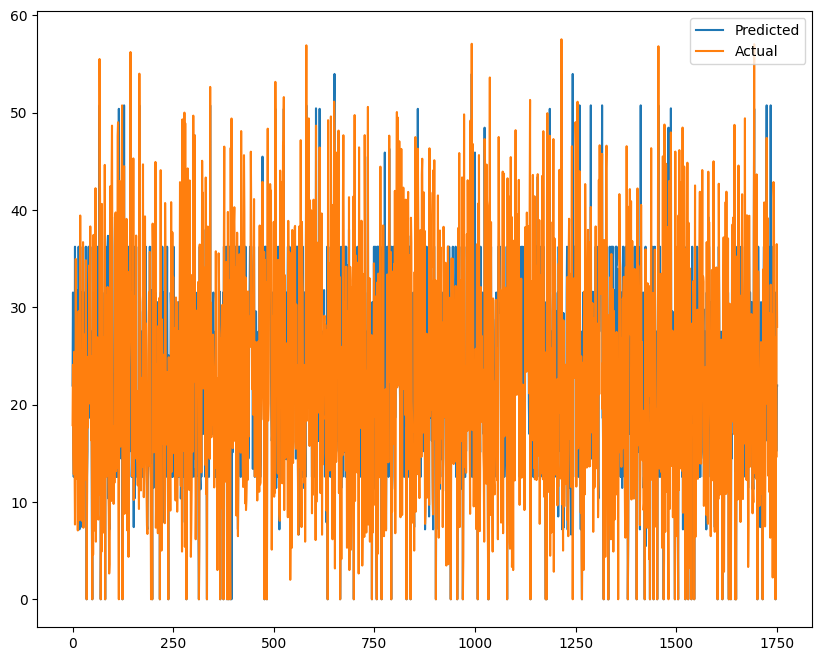

In [111]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## RANDOM FOREST

In [112]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [113]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [114]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9896394884521101
MSE : 1.5989700994756837
RMSE : 1.2645038946067677
MAE : 0.7996438767362765
R2 : 0.9896394884521101
Adjusted R2 : 0.9893474716850528


- **Looks like our train set's r2 score value is 0.98 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [116]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 13.1358723009083
RMSE : 3.62434439601265
MAE : 2.226235653078313
R2 : 0.916590358191646
Adjusted R2 : 0.9142394111530078


- **The r2_score for the test set is 0.91. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter**).

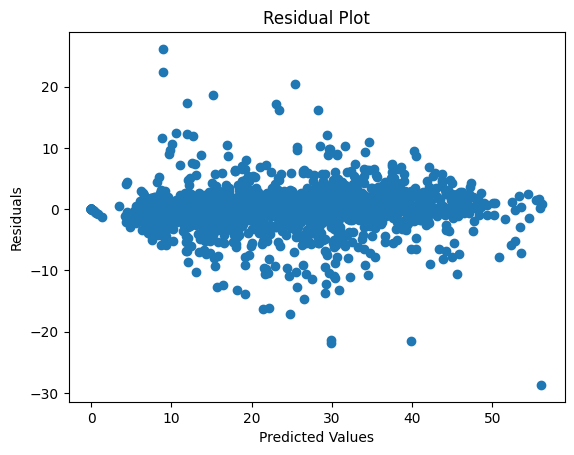

In [118]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [119]:
rf_model.feature_importances_

array([3.11246754e-01, 1.52163200e-01, 1.05311907e-02, 1.10203267e-02,
       1.90521693e-02, 2.50942712e-02, 2.99781524e-02, 1.40879226e-03,
       5.13262593e-03, 1.43088295e-02, 2.09158360e-02, 3.17393673e-02,
       2.75330705e-02, 9.06147324e-03, 4.04295283e-03, 1.46920180e-02,
       9.15593681e-04, 1.90592598e-03, 1.00703305e-03, 2.48226479e-04,
       2.44877812e-04, 3.33345388e-04, 1.36800441e-03, 3.29975537e-03,
       1.03269820e-02, 3.18891873e-02, 1.60885694e-02, 1.09798688e-02,
       1.13358119e-02, 8.75534016e-03, 3.01155774e-03, 3.75851116e-03,
       9.11444001e-04, 9.52865641e-03, 4.15583268e-03, 1.52272465e-01,
       2.85334500e-04, 3.76272064e-03, 1.11813426e-03, 1.41914683e-03,
       2.10219453e-03, 5.75974151e-04, 1.38681816e-03, 8.81295806e-04,
       3.30722158e-03, 5.45862856e-03, 7.58035963e-04, 1.86864754e-02])

## FEATURES STORED

In [120]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)


importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
35,Functioning_Day_Yes,0.15
1,Humidity,0.15
25,Hour_18,0.03
5,Solar_Radiation,0.03
6,Rainfall,0.03
12,Hour_5,0.03
11,Hour_4,0.03
10,Hour_3,0.02
26,Hour_19,0.02


In [121]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)


RandomForestRegressor()

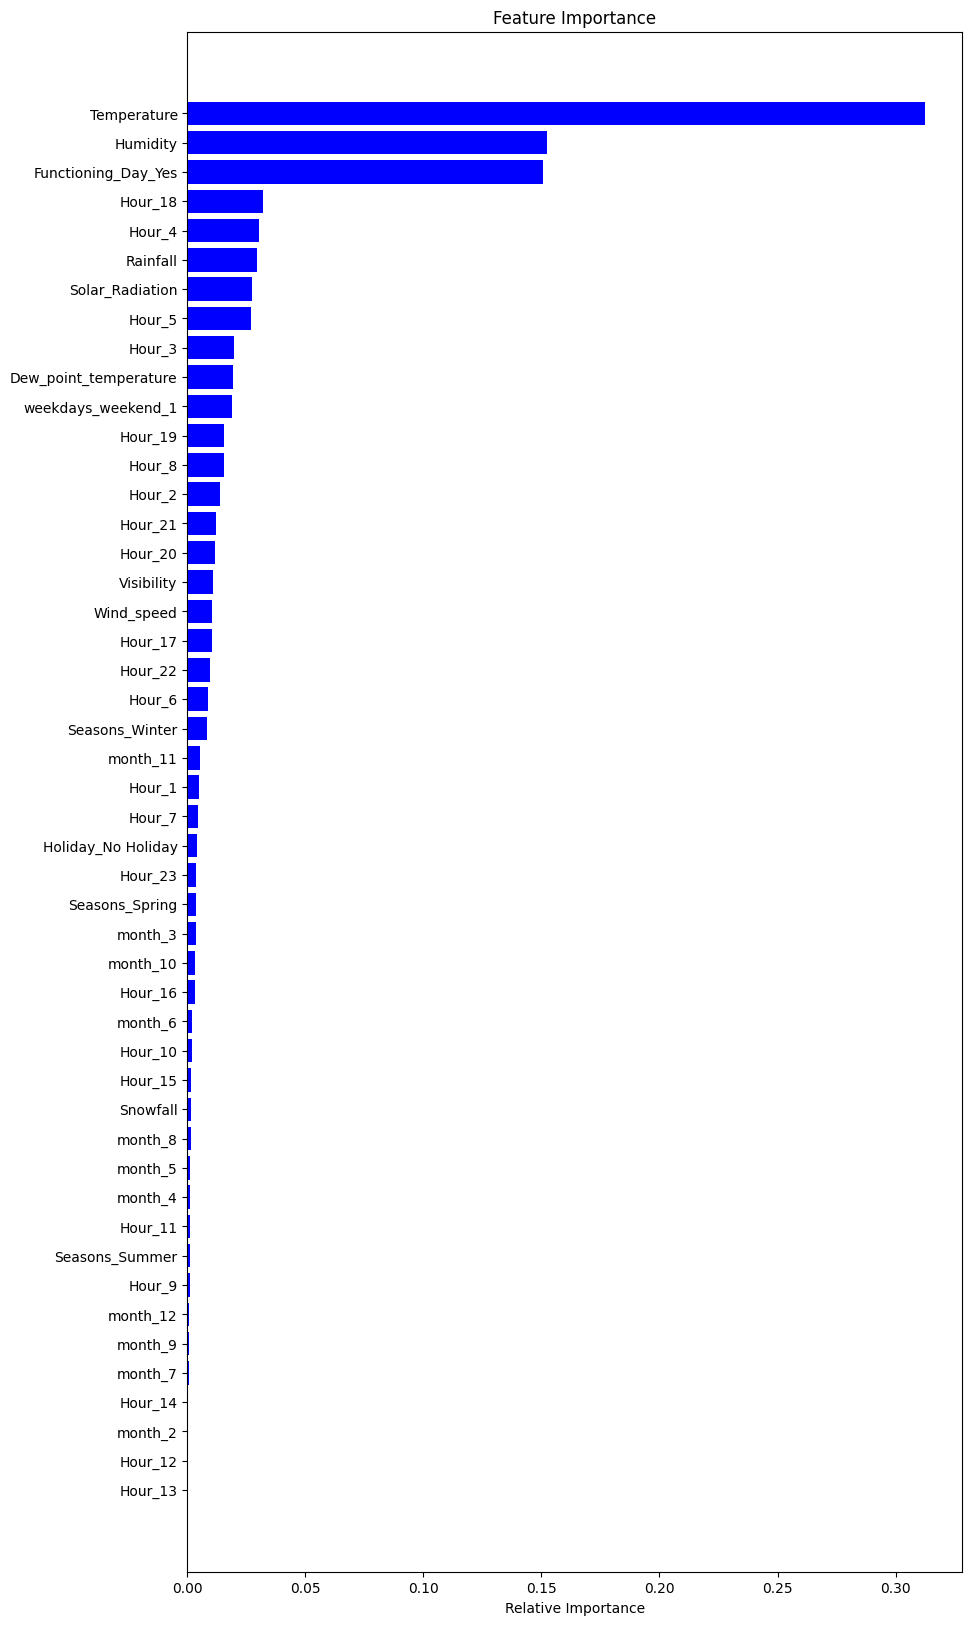

In [122]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)


#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**

In [123]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [124]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [125]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8791725614198014
MSE : 18.647675898331727
RMSE : 4.318295485296453
MAE : 3.2787309838424257
R2 : 0.8791725614198014
Adjusted R2 : 0.8757669730158968


- **Looks like our train set's r2 score value is 0.87 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons**.

In [128]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 21.307303956421723
RMSE : 4.615983530778865
MAE : 3.473640384122422
R2 : 0.864703725021446
Adjusted R2 : 0.8608903244348514


- **The r2_score for the test set is 0.86. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

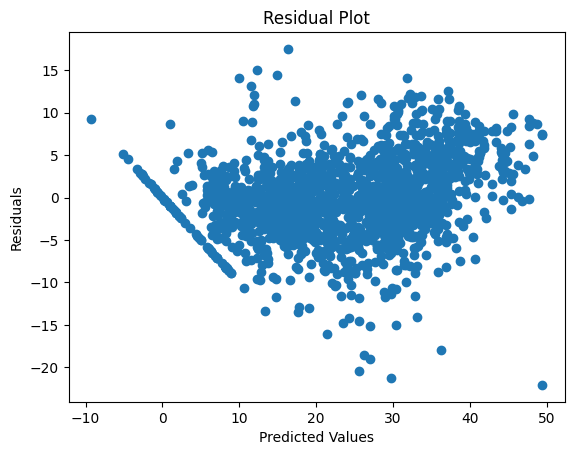

In [130]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [131]:
gb_model.feature_importances_

array([3.16818124e-01, 1.21299096e-01, 2.34247969e-04, 4.59964096e-04,
       1.17211066e-02, 4.79245790e-02, 6.08222892e-02, 2.22918491e-04,
       3.82617748e-04, 5.89939577e-03, 1.41370209e-02, 2.54452319e-02,
       2.35391254e-02, 5.76752514e-03, 0.00000000e+00, 9.71269101e-03,
       0.00000000e+00, 3.05575467e-03, 1.42276670e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.60592868e-04,
       7.67932784e-03, 2.99500402e-02, 1.66295890e-02, 1.10872513e-02,
       1.59319639e-02, 1.21074498e-02, 5.65577040e-04, 0.00000000e+00,
       4.06727650e-05, 3.55153750e-02, 2.50560859e-03, 1.81241555e-01,
       0.00000000e+00, 1.45223330e-03, 0.00000000e+00, 3.89669335e-04,
       3.32175454e-03, 0.00000000e+00, 1.82309387e-03, 0.00000000e+00,
       8.15822014e-03, 5.16759858e-03, 3.21519140e-04, 1.68864542e-02])

# FEATURES STORED

In [132]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)


importance_df.head()

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.12
2,Wind_speed,0.00
3,Visibility,0.00
4,Dew_point_temperature,0.01


In [133]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
35,Functioning_Day_Yes,0.18
1,Humidity,0.12
6,Rainfall,0.06
5,Solar_Radiation,0.05
33,Seasons_Winter,0.04
11,Hour_4,0.03
25,Hour_18,0.03
28,Hour_21,0.02
26,Hour_19,0.02


In [134]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

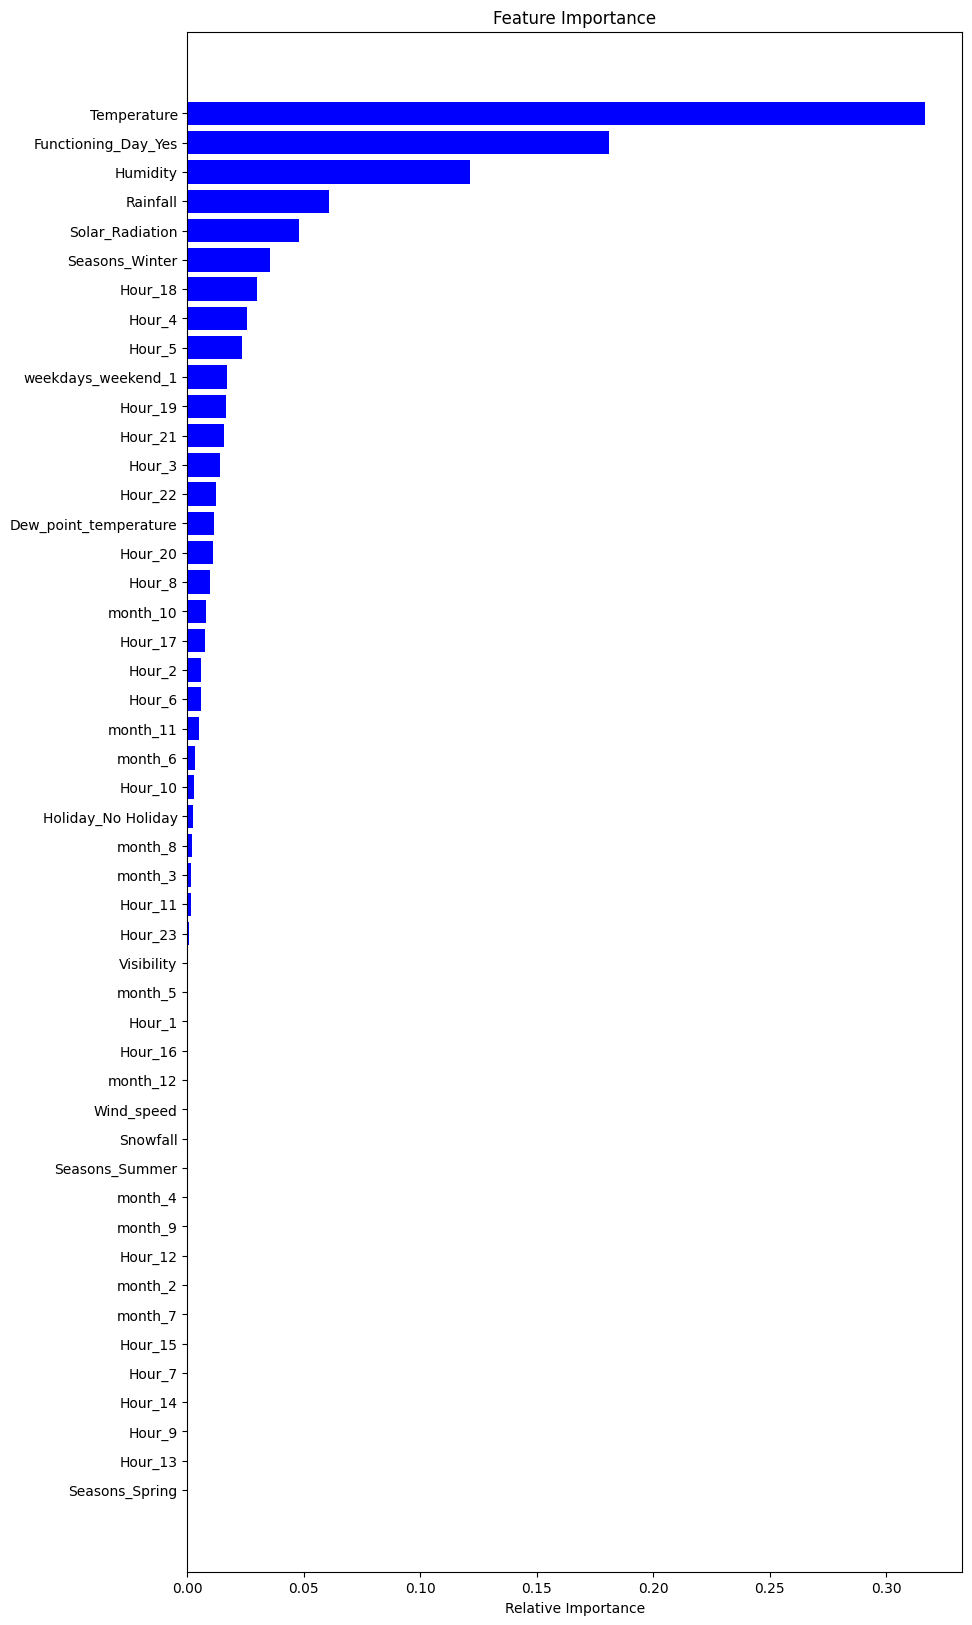

In [135]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)


#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Gradient boosting And Random forest either is considered to be good for evalution as there r2 score both for test and training data is good**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Gradient boosting is considered to be my choice as it is giving better r2 score than random forest**

# **Conclusion**

During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.
Subsequently, we employed 6 machine learning algorithms including Linear Regression,Lasso , Ridge, Decision Tree, Random Forest and Gradient Boosting

**Below are the R2_score and Adjusted r2_score** of the evaluation matrics


**Training set**
1	**Linear regression =	0.776 ,	0.77**

2 **Lasso regression	=	0.409 ,	0.39**

3	**Ridge regression	=	0.776 ,	0.77**

4	**Dicision tree regression = 0.686 ,	0.67**

5	**Random forest regression = 0.989 ,	0.98**

6	**Gradient boosting regression	=	0.876 ,	0.87**


**Test set**

1	**Linear regression	= 0.785 ,	0.78**

2	**Lasso regression = 	0.381	, 0.36**

3	**Ridge regression = 0.785 ,	0.77**

4	**Dicision tree regression = 0.61 ,	0.60**

5	**Random forest regression	=	0.919	 , 0.92**

6	**Gradient boosting regression	= 	0.864	 , 0.86**


We train a model to predict the number of rented bike count in given weather conditions. First, we do Exploratory Data Analysis on the data set. We look for null values that is not found in dataset and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.

- **Gradient Boosting gridsearchcv model shows promising result with R2 score of 0.91, therefore it can be used to solve this problem.**

- **Temperatue, Functioning_Day_Yes, Humidity, Rainfall and Solar radiation are major driving factors for the Bike rent demand.**

- **Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.**

- **People prefer to rent bike more in summer than in winter.**

- **Bike demand is more on clear days than on snowy or rainy days.**

- **Temperature range from 22 to 25(°C) has more demand for bike.**

Although the current analysis may be insightful, it is important to note that the dataset is time-dependent and variables such as temperature, windspeed and solar radiation may not always remain consistent. As a result there may be situations where the model fails to perform well. As field of machine learning is constantly evolving, it is necessary to stay up-to-date with the latest developments and be prepared to handle unexpected scenarios. Maintaining a strong understanding of Machine Learning concepts will undoubtely provide an advantage in staying ahead in the future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***